<a href="https://colab.research.google.com/github/amgothhrithik/Search_Engine/blob/main/image_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system ==

In [3]:
from datasets import load_dataset

dataset =  load_dataset(
    "ashraq/fashion-product-images-small",
    split="train" )


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/867 [00:00<?, ?B/s]

(…)-00000-of-00002-6cff4c59f91661c3.parquet:   0%|          | 0.00/136M [00:00<?, ?B/s]

(…)-00001-of-00002-bb459e5ac5f01e71.parquet:   0%|          | 0.00/135M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/44072 [00:00<?, ? examples/s]

In [4]:
print(dataset.features)

{'id': Value(dtype='int64', id=None), 'gender': Value(dtype='string', id=None), 'masterCategory': Value(dtype='string', id=None), 'subCategory': Value(dtype='string', id=None), 'articleType': Value(dtype='string', id=None), 'baseColour': Value(dtype='string', id=None), 'season': Value(dtype='string', id=None), 'year': Value(dtype='float64', id=None), 'usage': Value(dtype='string', id=None), 'productDisplayName': Value(dtype='string', id=None), 'image': Image(mode=None, decode=True, id=None)}


In [ ]:
print(dataset[100])

{'id': 19311, 'gender': 'Men', 'masterCategory': 'Footwear', 'subCategory': 'Shoes', 'articleType': 'Casual Shoes', 'baseColour': 'White', 'season': 'Fall', 'year': 2011.0, 'usage': 'Casual', 'productDisplayName': 'Nike Men Air Rift MTR White Casual Shoe', 'image': <PIL.Image.Image image mode=RGB size=60x80 at 0x7BD768998450>}


In [5]:


from sentence_transformers import SentenceTransformer, util
from PIL import Image
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
#Load CLIP model
model = SentenceTransformer('clip-ViT-B-32').to(device)

modules.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.91k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/604 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [6]:
images=dataset['image']

In [7]:
caption=dataset['productDisplayName']

In [ ]:
embedding=[]
batch_size=32
image_embeddings = model.encode(images, convert_to_tensor=True, batch_size=batch_size, device=device)
caption_embeddings = model.encode(caption, convert_to_tensor=True, batch_size=batch_size, device=device)

# Compute final embedding
final_embeddings = 0.6 * caption_embeddings + 0.4 * image_embeddings


In [ ]:
final_embeddings.shape

torch.Size([44072, 512])

In [ ]:
import numpy as np

np.save("/content/drive/MyDrive/Data/search_engine/embeddings.npy", final_embeddings.cpu().numpy())  # Move to CPU before saving


In [10]:
import numpy as np
embeddings = np.load("/content/drive/MyDrive/Data/search_engine/embeddings.npy")

In [11]:
!pip install faiss-cpu  # Install CPU version (works on any system)
  # If using GPU else !pip install faiss-cpu



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 18.5 MB/s eta 0:00:00


In [12]:
import faiss
import numpy as np

# Convert PyTorch tensor to NumPy (FAISS works with NumPy)
embeddings_np = embeddings.astype("float32")
faiss.normalize_L2(embeddings_np)
index = faiss.IndexFlatIP(512)  # Inner Product (Cosine when normalized)
index.add(embeddings_np)

In [ ]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
#Load CLIP model
model = SentenceTransformer('clip-ViT-B-32').to(device)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

modules.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.91k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/604 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [13]:
query_text=["A stylish red shoes"]
query_embedding = model.encode(query_text, convert_to_tensor=True).cpu().numpy().astype("float32")

# Normalize for cosine similarity (since we used IndexFlatIP)
faiss.normalize_L2(query_embedding)

In [14]:
D, I = index.search(query_embedding, 5)  # Find top 5 similar products

print("Top 5 similar product indices:", I[0])

Top 5 similar product indices: [14622  9585    69 33473 20238]


In [15]:
import pandas as pd
df = pd.DataFrame(dataset)

In [16]:
gender="Men"
usage=None
baseColour=None
season=None
articleType=None

In [17]:

filtered=df.iloc[I[0]]
query = True  # Default condition (select all)

if gender is not None:
    query &= filtered["gender"] == gender  # Apply gender filter

if usage is not None:
    query &= filtered["usage"] == usage  # Apply usage filter
if baseColour is not None:
    query &= filtered["baseColour"] == baseColour

if season is not None:
    query &= filtered["season"] == season  # Apply usage filter


if articleType is not None:
    query &= filtered["articleType"] == articleType  # Apply usage filter
filtered = filtered[query]


In [18]:
filtered

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
14622,22237,Men,Footwear,Shoes,Casual Shoes,Red,Summer,2011.0,Casual,ID Men Red Shoes,<PIL.Image.Image image mode=RGB size=60x80 at ...
9585,6363,Men,Footwear,Shoes,Casual Shoes,Red,Summer,2011.0,Casual,Numero Uno Men's Red Shoe,<PIL.Image.Image image mode=RGB size=60x80 at ...
69,26538,Men,Footwear,Shoes,Casual Shoes,Red,Fall,2012.0,Casual,ID Men Red Shoes,<PIL.Image.Image image mode=RGB size=60x80 at ...


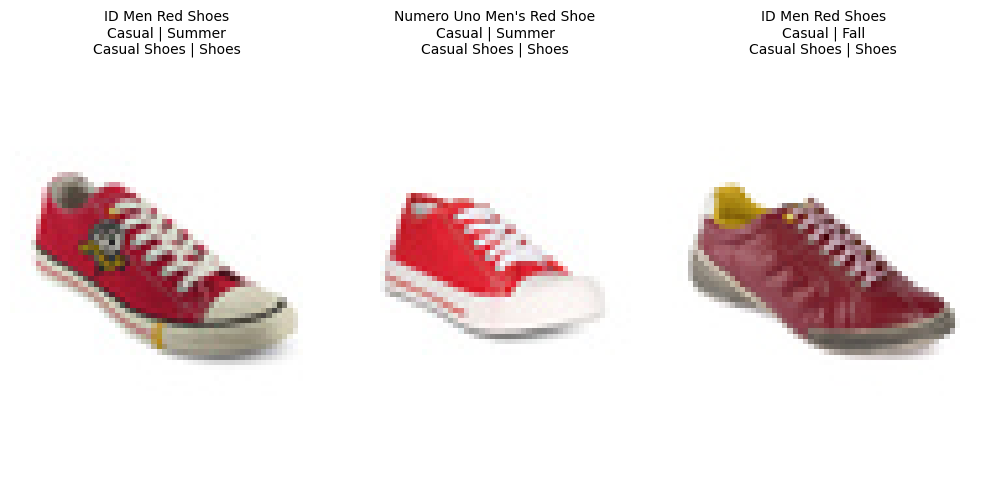

In [19]:
import cv2
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, len(filtered), figsize=(10, 5))
for ax, (_, row) in zip(axes,filtered.iterrows()):
    img = row["image"]  # Directly use NumPy array

    ax.imshow(img)  # Display image
    ax.axis("off")  # Hide axes

    # Create text label
    label = f"{row['productDisplayName']}\n{row['usage']} | {row['season']}\n{row['articleType']} | {row['subCategory']}"
    ax.set_title(label, fontsize=10)

plt.tight_layout()
plt.show()